In [1]:
import gdown
import pathlib

if not pathlib.Path('files.zip').is_file():
  url = 'https://drive.google.com/uc?id=1zF9ipvzoEKjkiKvJmpoJ_zgg8O8E5vld'
  output = 'files.zip'
  gdown.download(url, output, quiet=False) 
  !unzip files.zip

Downloading...
From: https://drive.google.com/uc?id=1zF9ipvzoEKjkiKvJmpoJ_zgg8O8E5vld
To: /content/files.zip
12.3MB [00:00, 72.7MB/s]


Archive:  files.zip
   creating: SPLIT2/
   creating: SPLIT2/128x128_RGB_uniform/
   creating: SPLIT2/128x128_RGB_uniform/test/
   creating: SPLIT2/128x128_RGB_uniform/test/A/
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A0.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A1.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A10.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A11.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A12.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A13.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A14.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A15.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A16.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A17.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A18.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A19.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A2.jpg  
  inflating: SPLIT2/128x128_RGB_uniform/test/A/A3.jpg  
  inflating: SPLIT2/128x128_RG

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# p = pathlib.Path('./SPLIT1/32x32_RGB/val')
p = pathlib.Path('./SPLIT2/32x32_RGB_uniform')
dirlist = [x for x in p.iterdir() if x.is_dir()]
print(dirlist)
lengths = []
for path in dirlist:
  files = [x for x in path.iterdir() if x.is_file()]
  # print(path)
  length = len(files)
  # print(length)
  lengths.append(length)
minimum_length = min(lengths)
print(minimum_length)

pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/test').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/val').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/train').mkdir(parents=True, exist_ok=True)

pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/test/A/A').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/test/B/B').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/test/C/C').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/test/D/D').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/test/X/X').mkdir(parents=True, exist_ok=True)

pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/val/A/A').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/val/B/B').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/val/C/C').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/val/D/D').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/val/X/X').mkdir(parents=True, exist_ok=True)

pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/train/A/A').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/train/B/B').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/train/C/C').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/train/D/D').mkdir(parents=True, exist_ok=True)
pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm/train/X/X').mkdir(parents=True, exist_ok=True)

[PosixPath('SPLIT2/32x32_RGB_uniform/val'), PosixPath('SPLIT2/32x32_RGB_uniform/train'), PosixPath('SPLIT2/32x32_RGB_uniform/test')]
0


In [4]:
batch_size = 32
img_height = 32
img_width = 32

In [5]:
def gaussian_noise(img):
    noise = np.random.normal(0, 10, img.shape)
    return np.clip(img+noise, 0, 255)

train_datagen = keras.preprocessing.image.ImageDataGenerator(
        # rescale=1/255.0,  # normalization to range  [0; 1]
        # samplewise_std_normalization=True,  # normalization with standard deviation 1 and average 0 
        # samplewise_center=True,             # divide each input by its std and set each sample mean to 0 
        shear_range=10, 
        brightness_range=(0.7, 1.1),
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest',
        preprocessing_function=gaussian_noise
    )


In [6]:
train_data_dir = pathlib.Path('./SPLIT2/32x32_RGB_uniform/train')
val_data_dir = pathlib.Path('./SPLIT2/32x32_RGB_uniform/val')
test_data_dir = pathlib.Path('./SPLIT2/32x32_RGB_uniform/test')

In [7]:
def copyImgForAugm(itherdirpath):
  dirlist = [x for x in itherdirpath.iterdir() if x.is_dir()]
  print(dirlist)
  lengths = []
  for path in dirlist:
    files = [x for x in path.iterdir() if x.is_file()]
    # print(path)
    length = len(files)
    # print(length)
    lengths.append(length)
  minimum_length = min(lengths)
  maximum_length = max(lengths)
  print(minimum_length)
  print(lengths)

  import shutil

  for path in dirlist:
    files = [x for x in path.iterdir() if x.is_file()]
    length = len(files)
    newImg = minimum_length*2-length;
    print(newImg)
    cnt = 0
    for img_file in files:
      if (cnt<newImg):
        image = tf.keras.preprocessing.image.load_img(img_file)
        orginal_file = img_file
        img_file = str(img_file)
        img_file = img_file.replace("32x32_RGB_uniform","32x32_RGB_uniform/augm")
        img_file = img_file.replace("/A/","/A/A/")
        img_file = img_file.replace("/B/","/B/B/")
        img_file = img_file.replace("/C/","/C/C/")
        img_file = img_file.replace("/D/","/D/D/")
        img_file = img_file.replace("/X/","/X/X/")
        img_file = pathlib.Path(img_file)
        shutil.copyfile(orginal_file,img_file)
        cnt = cnt+1
    print(cnt)

if 'augm' in locals():
  print(1)
else:
  augm = 1
  print(2)
  copyImgForAugm(train_data_dir)
  copyImgForAugm(val_data_dir)
  # copyImgForAugm(test_data_dir)

2
[PosixPath('SPLIT2/32x32_RGB_uniform/train/X'), PosixPath('SPLIT2/32x32_RGB_uniform/train/C'), PosixPath('SPLIT2/32x32_RGB_uniform/train/B'), PosixPath('SPLIT2/32x32_RGB_uniform/train/D'), PosixPath('SPLIT2/32x32_RGB_uniform/train/A')]
128
[160, 128, 160, 160, 160]
96
96
128
128
96
96
96
96
96
96
[PosixPath('SPLIT2/32x32_RGB_uniform/val/X'), PosixPath('SPLIT2/32x32_RGB_uniform/val/C'), PosixPath('SPLIT2/32x32_RGB_uniform/val/B'), PosixPath('SPLIT2/32x32_RGB_uniform/val/D'), PosixPath('SPLIT2/32x32_RGB_uniform/val/A')]
17
[20, 17, 20, 20, 20]
14
14
17
17
14
14
14
14
14
14


In [8]:
def augmentImagesIn(path1,path2):
    pathlib.Path(path2).mkdir(parents=True, exist_ok=True)#path2 może jeszcze nie istnieć
    augm_train_ds = train_datagen.flow_from_directory(path1,target_size=(32,32),
                                                  color_mode="rgb",
                                                  class_mode='sparse',
                                                  save_to_dir=pathlib.Path(path2),
                                                  save_format="jpg",
                                                  save_prefix="augm_",
                                                  batch_size = 1
                                                  ) #tworzy generator
    cnt = 0
    p = pathlib.Path(path1)
    dirlist = [x for x in p.iterdir() if x.is_dir()]
    # print(dirlist)
    lengths = []
    for path in dirlist:
      files = [x for x in path.iterdir() if x.is_file()]
      # print(path)
      length = len(files)
      # print(length)
      lengths.append(length)
    minimum_length = min(lengths) #sprawdzamy ile jest zdjęć w folderze, tyle wczyta generator, tyle trzeba wygenerować
    print(minimum_length)
    for i in range(0,minimum_length): 
      cnt = cnt +1
      # print(cnt)
      augm_train_ds.next()
    print(cnt)

In [9]:
if 'augm2' in locals():
  print(1)
else:
  augm2 = 1
  print(2)
  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/train/A','./SPLIT2/32x32_RGB_uniform/augm2/train/A')
  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/train/B','./SPLIT2/32x32_RGB_uniform/augm2/train/B')
  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/train/C','./SPLIT2/32x32_RGB_uniform/augm2/train/C')
  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/train/D','./SPLIT2/32x32_RGB_uniform/augm2/train/D')
  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/train/X','./SPLIT2/32x32_RGB_uniform/augm2/train/X')

  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/val/A','./SPLIT2/32x32_RGB_uniform/augm2/val/A')
  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/val/B','./SPLIT2/32x32_RGB_uniform/augm2/val/B')
  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/val/C','./SPLIT2/32x32_RGB_uniform/augm2/val/C')
  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/val/D','./SPLIT2/32x32_RGB_uniform/augm2/val/D')
  augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/val/X','./SPLIT2/32x32_RGB_uniform/augm2/val/X')

  # augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/test/A','./SPLIT2/32x32_RGB_uniform/augm2/test/A')
  # augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/test/B','./SPLIT2/32x32_RGB_uniform/augm2/test/B')
  # augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/test/C','./SPLIT2/32x32_RGB_uniform/augm2/test/C')
  # augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/test/D','./SPLIT2/32x32_RGB_uniform/augm2/test/D')
  # augmentImagesIn('./SPLIT2/32x32_RGB_uniform/augm/test/X','./SPLIT2/32x32_RGB_uniform/augm2/test/X')

2
Found 96 images belonging to 1 classes.
96
96
Found 96 images belonging to 1 classes.
96
96
Found 128 images belonging to 1 classes.
128
128
Found 96 images belonging to 1 classes.
96
96
Found 96 images belonging to 1 classes.
96
96
Found 14 images belonging to 1 classes.
14
14
Found 14 images belonging to 1 classes.
14
14
Found 17 images belonging to 1 classes.
17
17
Found 14 images belonging to 1 classes.
14
14
Found 14 images belonging to 1 classes.
14
14


In [10]:
#copy augmented data to data
import shutil

def copyFilesTo(path1,dest):
  path = pathlib.Path(path1)
  dst = pathlib.Path(dest)
  files = [x for x in path.iterdir() if x.is_file()]
  for f in files:
    shutil.copy(f, dst)

if 'augm3' in locals():
  print(1)
else:
  augm3 = 1
  print(2)
  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/train/A','./SPLIT2/32x32_RGB_uniform/train/A')
  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/train/B','./SPLIT2/32x32_RGB_uniform/train/B')
  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/train/C','./SPLIT2/32x32_RGB_uniform/train/C')
  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/train/D','./SPLIT2/32x32_RGB_uniform/train/D')
  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/train/X','./SPLIT2/32x32_RGB_uniform/train/X')

  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/val/A','./SPLIT2/32x32_RGB_uniform/val/A')
  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/val/B','./SPLIT2/32x32_RGB_uniform/val/B')
  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/val/C','./SPLIT2/32x32_RGB_uniform/val/C')
  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/val/D','./SPLIT2/32x32_RGB_uniform/val/D')
  copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/val/X','./SPLIT2/32x32_RGB_uniform/val/X')

  # copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/test/A','./SPLIT2/32x32_RGB_uniform/test/A')
  # copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/test/B','./SPLIT2/32x32_RGB_uniform/test/B')
  # copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/test/C','./SPLIT2/32x32_RGB_uniform/test/C')
  # copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/test/D','./SPLIT2/32x32_RGB_uniform/test/D')
  # copyFilesTo('./SPLIT2/32x32_RGB_uniform/augm2/test/X','./SPLIT2/32x32_RGB_uniform/test/X')

2


In [11]:
p = pathlib.Path('./SPLIT2/32x32_RGB_uniform/augm2/train')
# /content/SPLIT2/32x32_RGB_uniform/augm/train/A/A1.jpg
dirlist = [x for x in p.iterdir() if x.is_file()]
print(dirlist)
print(len(dirlist))

#Sprawdzanie czy powstały pliki

[]
0


In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1280 files belonging to 5 classes.


In [13]:
class_names = train_ds.class_names

In [14]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 96 files belonging to 5 classes.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_data_dir,
  seed=123,
  # label_mode = 'categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 170 files belonging to 5 classes.


In [16]:
# y = np.concatenate([y for x, y in val_ds], axis=0)

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)#shuffle(1000).
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
num_classes = 5

# model = Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

#model z https://medium.com/dive-into-ml-ai/dealing-with-memory-leak-issue-in-keras-model-training-e703907a6501
model = Sequential()
inputShape = (img_height, img_width, 3)
model.add(layers.Conv2D(8, (5, 5), input_shape=inputShape,      activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))#bylo 0.5
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0

In [19]:
# !pip install tensorflow-addons
# import tensorflow_addons as tfa
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
from timeit import default_timer as timer
from datetime import timedelta

In [21]:
%%time
start = timer()
epochs=45
#3000 ok 11 min dla modelu z google
#3000 ok 12 min dla 3 modelu
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

end = timer()
print(timedelta(seconds=end-start))

Epoch 1/45


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


40/40 [==============================] - 3s 56ms/step - loss: 1.3339 - accuracy: 0.5359 - val_loss: 1.4299 - val_accuracy: 0.4176
Epoch 2/45
40/40 [==============================] - 2s 44ms/step - loss: 0.7483 - accuracy: 0.7359 - val_loss: 1.2804 - val_accuracy: 0.4471
Epoch 3/45
40/40 [==============================] - 2s 43ms/step - loss: 0.4255 - accuracy: 0.8492 - val_loss: 1.0184 - val_accuracy: 0.5941
Epoch 4/45
40/40 [==============================] - 2s 40ms/step - loss: 0.2393 - accuracy: 0.9211 - val_loss: 1.0698 - val_accuracy: 0.6000
Epoch 5/45
40/40 [==============================] - 2s 43ms/step - loss: 0.1597 - accuracy: 0.9516 - val_loss: 0.8241 - val_accuracy: 0.7059
Epoch 6/45
40/40 [==============================] - 2s 43ms/step - loss: 0.1027 - accuracy: 0.9742 - val_loss: 1.1838 - val_accuracy: 0.6471
Epoch 7/45
40/40 [==============================] - 2s 43ms/step - loss: 0.1105 - accuracy: 0.9609 - val_loss: 0.9473 - val_accuracy: 0.6824
Epoch 8/45
40/40 [======

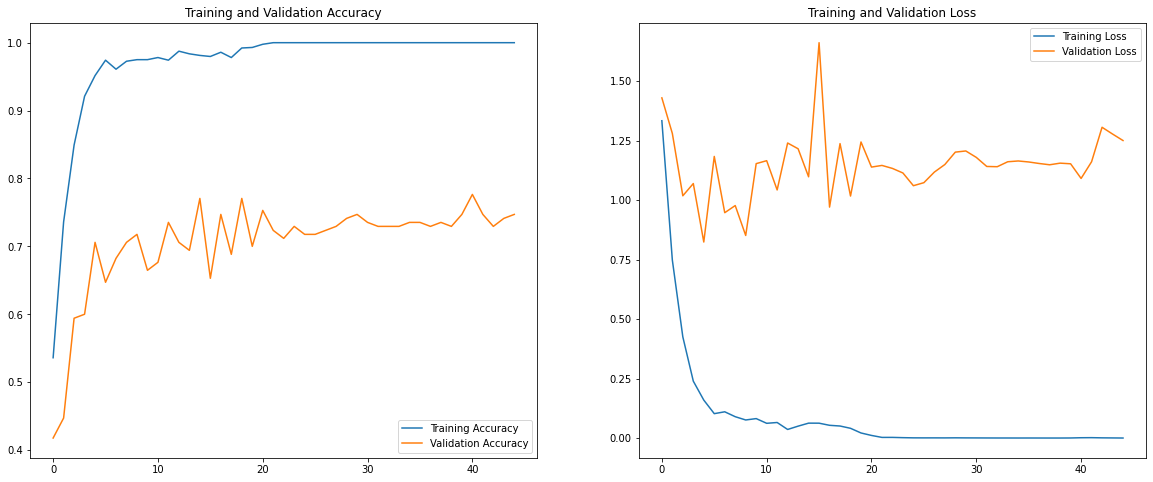

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
predictions = model.predict(test_ds)

score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B with a 40.46 percent confidence.



train:
40/40 [==============================] - 1s 14ms/step - loss: 2.5728e-04 - accuracy: 1.0000
loss = 0.0002572824014350772
accuracy = 1.0
f1-score = 1.0
auc = 1.0

val:
6/6 [==============================] - 0s 13ms/step - loss: 1.2506 - accuracy: 0.7471
loss = 1.2506076097488403
accuracy = 0.7470588235294118
f1-score = 0.7372376748688593
auc = 0.9411332179930796

test:
3/3 [==============================] - 0s 16ms/step - loss: 1.0928 - accuracy: 0.8021
loss = 1.0927942991256714
accuracy = 0.8020833333333334
f1-score = 0.802431001283697
auc = 0.9543996710526316


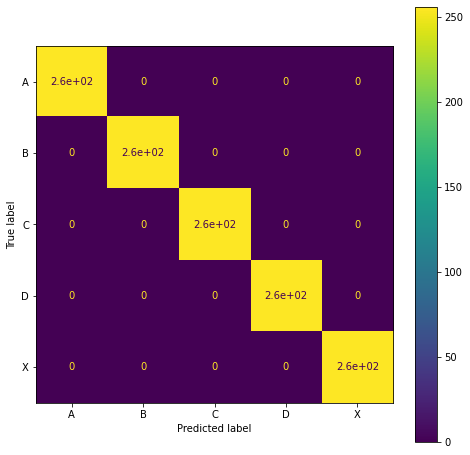

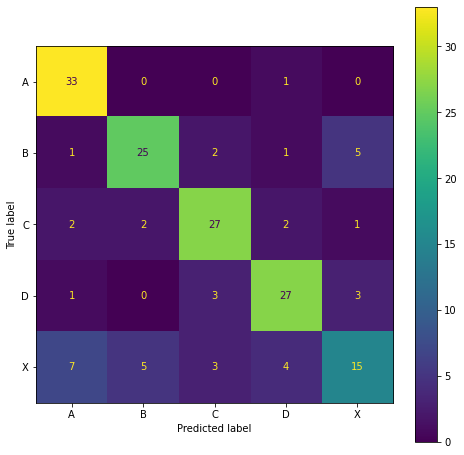

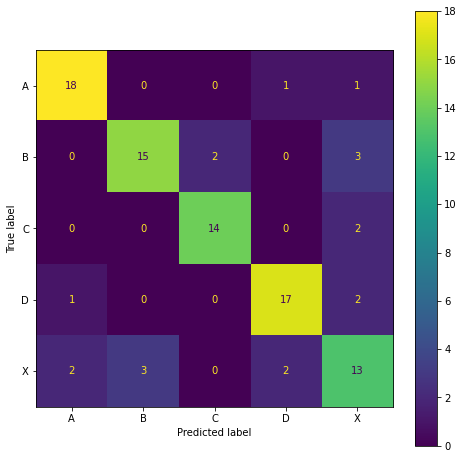

In [24]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

test_array = [('train', train_ds),('val', val_ds), ('test', test_ds)]

for ds_name, curr_ds in test_array:
  print("\n"+ds_name+":")
  pred = model.predict(curr_ds)
  y_pred = np.argmax(pred, axis=-1)
  y_true = np.array([])
  for _, labels in curr_ds:
    y_true = np.concatenate([y_true, labels])
  result = model.evaluate(curr_ds)
  print('loss = '+str(result[0]))
  print('accuracy = '+str(accuracy_score(y_true, y_pred)))
  print('f1-score = '+str(f1_score(y_true, y_pred, average='weighted')))
  print('auc = '+str(roc_auc_score(y_true, pred, multi_class='ovr', average='weighted')))

  cfmx_disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names)
  _, ax = plt.subplots(figsize=(8,8))
  cfmx_disp.plot(ax=ax)

In [25]:
print(predictions)

[[1.79509800e-16 1.00000000e+00 5.33624895e-14 4.80139496e-12
  6.08499709e-11]
 [1.80260930e-02 9.63805020e-01 4.57126927e-03 1.04447175e-02
  3.15276999e-03]
 [7.69606046e-10 1.86555410e-10 9.32951938e-09 9.99999404e-01
  5.93066204e-07]
 [9.63413157e-03 7.65667390e-03 9.37856748e-05 3.85017520e-05
  9.82576907e-01]
 [1.18315356e-05 7.68577389e-04 7.98428893e-01 3.22328391e-03
  1.97567448e-01]
 [9.40211654e-01 1.00370450e-07 3.32676200e-06 1.00564330e-06
  5.97838126e-02]
 [1.67354330e-13 3.07121060e-12 1.34379237e-08 4.72632988e-10
  1.00000000e+00]
 [2.77065305e-06 1.28158265e-11 4.68013850e-09 9.99997258e-01
  5.20916750e-08]
 [4.38371440e-03 1.45333670e-02 2.50359335e-07 3.75345000e-03
  9.77329195e-01]
 [1.50049589e-15 4.17100381e-07 9.99999642e-01 1.45190704e-09
  5.93883271e-08]
 [9.93011296e-01 1.73987580e-08 6.99396239e-08 1.94213673e-04
  6.79434417e-03]
 [7.85498202e-01 5.60389226e-03 1.14386843e-03 3.33355827e-04
  2.07420617e-01]
 [3.82177177e-06 5.83040016e-03 7.301552

In [26]:
for predi in range(len(predictions)):
  predscore = tf.nn.softmax(predictions[predi])
  text = ""
  for classi in range(len(class_names)):
    text = text + "{} : {: <22}, ".format(class_names[classi], str(100*np.max(predscore[classi])))
  print(text)
    

A : 14.884759485721588    , B : 40.460970997810364    , C : 14.884759485721588    , D : 14.884759485721588    , X : 14.884759485721588    , 
A : 15.292537212371826    , B : 39.37550187110901     , C : 15.08815735578537     , D : 15.177036821842194    , X : 15.066768229007721    , 
A : 14.884759485721588    , B : 14.884759485721588    , C : 14.884759485721588    , D : 40.460947155952454    , X : 14.884768426418304    , 
A : 15.095026791095734    , B : 15.065206587314606    , C : 14.95169848203659     , D : 14.950872957706451    , X : 39.93719518184662     , 
A : 15.517310798168182    , B : 15.529058873653412    , C : 34.479787945747375    , D : 15.567225217819214    , X : 18.906614184379578    , 
A : 38.66613209247589     , B : 15.10087251663208     , C : 15.10092169046402     , D : 15.100887417793274    , X : 16.031190752983093    , 
A : 14.884757995605469    , B : 14.884757995605469    , C : 14.884757995605469    , D : 14.884757995605469    , X : 40.460968017578125    , 
A : 14.884808

Poprawny : B, A : 14.884759485721588    , B : 40.460970997810364    , C : 14.884759485721588    , D : 14.884759485721588    , X : 14.884759485721588    , 


<Figure size 72x72 with 0 Axes>

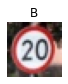


Poprawny : B, A : 15.292537212371826    , B : 39.37550187110901     , C : 15.08815735578537     , D : 15.177036821842194    , X : 15.066768229007721    , 


<Figure size 72x72 with 0 Axes>

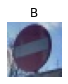


Poprawny : D, A : 14.884759485721588    , B : 14.884759485721588    , C : 14.884759485721588    , D : 40.460947155952454    , X : 14.884768426418304    , 


<Figure size 72x72 with 0 Axes>

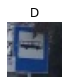


Poprawny : D, A : 15.095026791095734    , B : 15.065206587314606    , C : 14.95169848203659     , D : 14.950872957706451    , X : 39.93719518184662     , 


<Figure size 72x72 with 0 Axes>

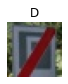


Poprawny : C, A : 15.517310798168182    , B : 15.529058873653412    , C : 34.479787945747375    , D : 15.567225217819214    , X : 18.906614184379578    , 


<Figure size 72x72 with 0 Axes>

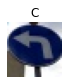


Poprawny : X, A : 38.66613209247589     , B : 15.10087251663208     , C : 15.10092169046402     , D : 15.100887417793274    , X : 16.031190752983093    , 


<Figure size 72x72 with 0 Axes>

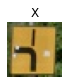


Poprawny : X, A : 14.884757995605469    , B : 14.884757995605469    , C : 14.884757995605469    , D : 14.884757995605469    , X : 40.460968017578125    , 


<Figure size 72x72 with 0 Axes>

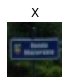


Poprawny : D, A : 14.884808659553528    , B : 14.884768426418304    , C : 14.884768426418304    , D : 40.46088457107544     , X : 14.884768426418304    , 


<Figure size 72x72 with 0 Axes>

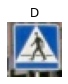


Poprawny : B, A : 15.035507082939148    , B : 15.18888920545578     , C : 14.96974378824234     , D : 15.0260329246521      , X : 39.77982997894287     , 


<Figure size 72x72 with 0 Axes>

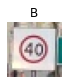


Poprawny : C, A : 14.884759485721588    , B : 14.884765446186066    , C : 40.46095609664917     , D : 14.884759485721588    , X : 14.884760975837708    , 


<Figure size 72x72 with 0 Axes>

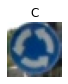


Poprawny : A, A : 40.25059640407562     , B : 14.911213517189026    , C : 14.911215007305145    , D : 14.91410881280899     , X : 15.012870728969574    , 


<Figure size 72x72 with 0 Axes>

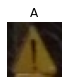


Poprawny : A, A : 34.10770297050476     , B : 15.636828541755676    , C : 15.567243099212646    , D : 15.554630756378174    , X : 19.133596122264862    , 


<Figure size 72x72 with 0 Axes>

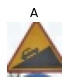


Poprawny : B, A : 15.665850043296814    , B : 15.757395327091217    , C : 32.51282572746277     , D : 20.39502114057541     , X : 15.66891223192215     , 


<Figure size 72x72 with 0 Axes>

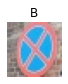


Poprawny : A, A : 40.460970997810364    , B : 14.884759485721588    , C : 14.884759485721588    , D : 14.884759485721588    , X : 14.884759485721588    , 


<Figure size 72x72 with 0 Axes>

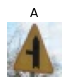


Poprawny : D, A : 14.884833991527557    , B : 14.884833991527557    , C : 14.884863793849945    , D : 40.46037793159485     , X : 14.885097742080688    , 


<Figure size 72x72 with 0 Axes>

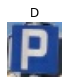


Poprawny : C, A : 14.884757995605469    , B : 14.884757995605469    , C : 40.460968017578125    , D : 14.884757995605469    , X : 14.884757995605469    , 


<Figure size 72x72 with 0 Axes>

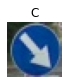


Poprawny : X, A : 15.131877362728119    , B : 38.392725586891174    , C : 15.131847560405731    , D : 15.131847560405731    , X : 16.211701929569244    , 


<Figure size 72x72 with 0 Axes>

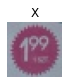


Poprawny : D, A : 14.884759485721588    , B : 14.884759485721588    , C : 14.884762465953827    , D : 40.46095907688141     , X : 14.884765446186066    , 


<Figure size 72x72 with 0 Axes>

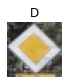


Poprawny : D, A : 14.885742962360382    , B : 14.887675642967224    , C : 14.88690972328186     , D : 40.45318067073822     , X : 14.886492490768433    , 


<Figure size 72x72 with 0 Axes>

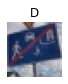


Poprawny : X, A : 14.885953068733215    , B : 14.885030686855316    , C : 14.885008335113525    , D : 14.885009825229645    , X : 40.45900106430054     , 


<Figure size 72x72 with 0 Axes>

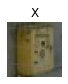


Poprawny : A, A : 39.92184400558472     , B : 14.951956272125244    , C : 14.95201289653778     , D : 14.951975643634796    , X : 15.222205221652985    , 


<Figure size 72x72 with 0 Axes>

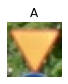


Poprawny : X, A : 15.052883327007294    , B : 15.04894644021988     , C : 15.04884958267212     , D : 15.733732283115387    , X : 39.11559283733368     , 


<Figure size 72x72 with 0 Axes>

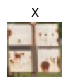


Poprawny : D, A : 14.897967875003815    , B : 14.898945391178131    , C : 14.942324161529541    , D : 40.356868505477905    , X : 14.903895556926727    , 


<Figure size 72x72 with 0 Axes>

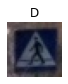


Poprawny : D, A : 14.884881675243378    , B : 14.884784817695618    , C : 14.884784817695618    , D : 40.46076536178589     , X : 14.884789288043976    , 


<Figure size 72x72 with 0 Axes>

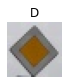


Poprawny : X, A : 15.018682181835175    , B : 14.965397119522095    , C : 14.920809864997864    , D : 14.920784533023834    , X : 40.17432630062103     , 


<Figure size 72x72 with 0 Axes>

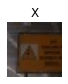


Poprawny : B, A : 15.329118072986603    , B : 36.53549551963806     , C : 15.333925187587738    , D : 15.339608490467072    , X : 17.461860179901123    , 


<Figure size 72x72 with 0 Axes>

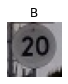


Poprawny : C, A : 14.885295927524567    , B : 14.886175096035004    , C : 40.45670926570892     , D : 14.885295927524567    , X : 14.88652229309082     , 


<Figure size 72x72 with 0 Axes>

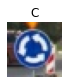


Poprawny : X, A : 14.88843709230423     , B : 14.885659515857697    , C : 14.885665476322174    , D : 14.886397123336792    , X : 40.453845262527466    , 


<Figure size 72x72 with 0 Axes>

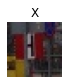


Poprawny : X, A : 14.896363019943237    , B : 40.368953347206116    , C : 14.896366000175476    , D : 14.896363019943237    , X : 14.941956102848053    , 


<Figure size 72x72 with 0 Axes>

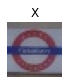


Poprawny : X, A : 15.45252799987793     , B : 14.996382594108582    , C : 14.996105432510376    , D : 14.996108412742615    , X : 39.55886960029602     , 


<Figure size 72x72 with 0 Axes>

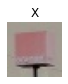


Poprawny : A, A : 40.460970997810364    , B : 14.884759485721588    , C : 14.884759485721588    , D : 14.884759485721588    , X : 14.884759485721588    , 


<Figure size 72x72 with 0 Axes>

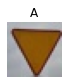


Poprawny : D, A : 15.667685866355896    , B : 15.668222308158875    , C : 15.706615149974823    , D : 20.518341660499573    , X : 32.43913948535919     , 


<Figure size 72x72 with 0 Axes>

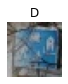


Poprawny : A, A : 40.46085476875305     , B : 14.884771406650543    , C : 14.884771406650543    , D : 14.884825050830841    , X : 14.884771406650543    , 


<Figure size 72x72 with 0 Axes>

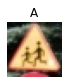


Poprawny : B, A : 14.885298907756805    , B : 40.45668542385101     , C : 14.885418117046356    , D : 14.885309338569641    , X : 14.887288212776184    , 


<Figure size 72x72 with 0 Axes>

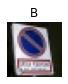


Poprawny : B, A : 14.994287490844727    , B : 39.58224058151245     , C : 14.993655681610107    , D : 15.03383070230484     , X : 15.395987033843994    , 


<Figure size 72x72 with 0 Axes>

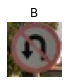


Poprawny : B, A : 14.893767237663269    , B : 14.925426244735718    , C : 40.38958251476288     , D : 14.893767237663269    , X : 14.897452294826508    , 


<Figure size 72x72 with 0 Axes>

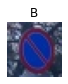


Poprawny : C, A : 15.561775863170624    , B : 19.41983848810196     , C : 15.562628209590912    , D : 15.563046932220459    , X : 33.89270901679993     , 


<Figure size 72x72 with 0 Axes>

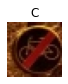


Poprawny : A, A : 40.460970997810364    , B : 14.884759485721588    , C : 14.884759485721588    , D : 14.884759485721588    , X : 14.884759485721588    , 


<Figure size 72x72 with 0 Axes>

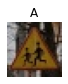


Poprawny : B, A : 14.884759485721588    , B : 40.460970997810364    , C : 14.884759485721588    , D : 14.884759485721588    , X : 14.884759485721588    , 


<Figure size 72x72 with 0 Axes>

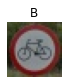


Poprawny : C, A : 14.97146487236023     , B : 14.970682561397552    , C : 39.76973593235016     , D : 15.317496657371521    , X : 14.970622956752777    , 


<Figure size 72x72 with 0 Axes>

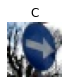


Poprawny : X, A : 14.885291457176208    , B : 14.885291457176208    , C : 14.88722711801529     , D : 14.885443449020386    , X : 40.45674800872803     , 


<Figure size 72x72 with 0 Axes>

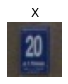


Poprawny : A, A : 29.71806824207306     , B : 22.718945145606995    , C : 15.81660509109497     , D : 15.816502273082733    , X : 15.929888188838959    , 


<Figure size 72x72 with 0 Axes>

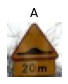


Poprawny : B, A : 14.885500073432922    , B : 40.45509994029999     , C : 14.885500073432922    , D : 14.885519444942474    , X : 14.888380467891693    , 


<Figure size 72x72 with 0 Axes>

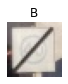


Poprawny : X, A : 15.070152282714844    , B : 15.836521983146667    , C : 15.070225298404694    , D : 15.088671445846558    , X : 38.93442451953888     , 


<Figure size 72x72 with 0 Axes>

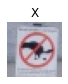


Poprawny : C, A : 14.887316524982452    , B : 14.887325465679169    , C : 40.440720319747925    , D : 14.88819569349289     , X : 14.896443486213684    , 


<Figure size 72x72 with 0 Axes>

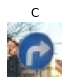


Poprawny : A, A : 40.46083688735962     , B : 14.88477736711502     , C : 14.884775876998901    , D : 14.88477885723114     , X : 14.884836971759796    , 


<Figure size 72x72 with 0 Axes>

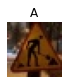


Poprawny : D, A : 14.884787797927856    , B : 14.884790778160095    , C : 14.884795248508453    , D : 40.46076536178589     , X : 14.884866774082184    , 


<Figure size 72x72 with 0 Axes>

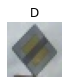


Poprawny : X, A : 38.807058334350586    , B : 15.084715187549591    , C : 15.084697306156158    , D : 15.084697306156158    , X : 15.938831865787506    , 


<Figure size 72x72 with 0 Axes>

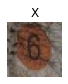


Poprawny : X, A : 15.44242650270462     , B : 15.315105020999908    , C : 15.264101326465607    , D : 37.216681241989136    , X : 16.76168590784073     , 


<Figure size 72x72 with 0 Axes>

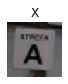


Poprawny : B, A : 14.89303857088089     , B : 40.39640724658966     , C : 14.90733027458191     , D : 14.8958221077919      , X : 14.9073988199234      , 


<Figure size 72x72 with 0 Axes>

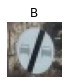


Poprawny : B, A : 14.913848042488098    , B : 40.229469537734985    , C : 14.913907647132874    , D : 14.913852512836456    , X : 15.028922259807587    , 


<Figure size 72x72 with 0 Axes>

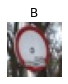


Poprawny : B, A : 14.899715781211853    , B : 40.34481942653656     , C : 14.899452030658722    , D : 14.89940732717514     , X : 14.956596493721008    , 


<Figure size 72x72 with 0 Axes>

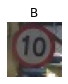


Poprawny : C, A : 15.47902524471283     , B : 15.47902524471283     , C : 34.90224480628967     , D : 18.660491704940796    , X : 15.479212999343872    , 


<Figure size 72x72 with 0 Axes>

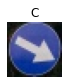


Poprawny : C, A : 14.884769916534424    , B : 14.884769916534424    , C : 40.460872650146484    , D : 14.884814620018005    , X : 14.884769916534424    , 


<Figure size 72x72 with 0 Axes>

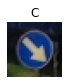


Poprawny : X, A : 14.884757995605469    , B : 14.884757995605469    , C : 14.884757995605469    , D : 14.884759485721588    , X : 40.46096205711365     , 


<Figure size 72x72 with 0 Axes>

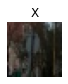


Poprawny : C, A : 14.885139465332031    , B : 14.885139465332031    , C : 40.457966923713684    , D : 14.885139465332031    , X : 14.886625111103058    , 


<Figure size 72x72 with 0 Axes>

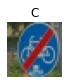


Poprawny : X, A : 14.898823201656342    , B : 14.898638427257538    , C : 14.922088384628296    , D : 14.928600192070007    , X : 40.35184681415558     , 


<Figure size 72x72 with 0 Axes>

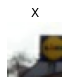


Poprawny : A, A : 40.460970997810364    , B : 14.884759485721588    , C : 14.884759485721588    , D : 14.884759485721588    , X : 14.884759485721588    , 


<Figure size 72x72 with 0 Axes>

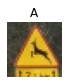


Poprawny : C, A : 15.325918793678284    , B : 15.328304469585419    , C : 16.56765788793564     , D : 16.09758883714676     , X : 36.6805225610733      , 


<Figure size 72x72 with 0 Axes>

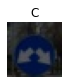


Poprawny : B, A : 14.89986926317215     , B : 14.95916098356247     , C : 14.899933338165283    , D : 14.899963140487671    , X : 40.341079235076904    , 


<Figure size 72x72 with 0 Axes>

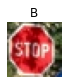


Poprawny : D, A : 14.889329671859741    , B : 14.885883033275604    , C : 14.886830747127533    , D : 40.45207500457764     , X : 14.885883033275604    , 


<Figure size 72x72 with 0 Axes>

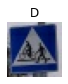


Poprawny : D, A : 14.885711669921875    , B : 14.885711669921875    , C : 14.889396727085114    , D : 40.45342803001404     , X : 14.885753393173218    , 


<Figure size 72x72 with 0 Axes>

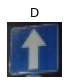


Poprawny : A, A : 32.69774317741394     , B : 15.648390352725983    , C : 15.648387372493744    , D : 15.648388862609863    , X : 20.35708725452423     , 


<Figure size 72x72 with 0 Axes>

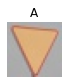


Poprawny : D, A : 14.892895519733429    , B : 14.886534214019775    , C : 14.88707810640335     , D : 40.446943044662476    , X : 14.88654911518097     , 


<Figure size 72x72 with 0 Axes>

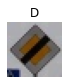


Poprawny : C, A : 14.884757995605469    , B : 14.884757995605469    , C : 40.460968017578125    , D : 14.884757995605469    , X : 14.884757995605469    , 


<Figure size 72x72 with 0 Axes>

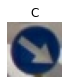


Poprawny : B, A : 16.106413304805756    , B : 19.972582161426544    , C : 19.722196459770203    , D : 17.20142513513565     , X : 26.997381448745728    , 


<Figure size 72x72 with 0 Axes>

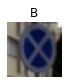


Poprawny : A, A : 40.460970997810364    , B : 14.884759485721588    , C : 14.884759485721588    , D : 14.884759485721588    , X : 14.884759485721588    , 


<Figure size 72x72 with 0 Axes>

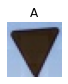


Poprawny : B, A : 14.91752564907074     , B : 40.200069546699524    , C : 14.917522668838501    , D : 14.91752564907074     , X : 15.047359466552734    , 


<Figure size 72x72 with 0 Axes>

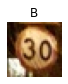


Poprawny : D, A : 14.884763956069946    , B : 14.884762465953827    , C : 14.88477736711502     , D : 40.46093225479126     , X : 14.884765446186066    , 


<Figure size 72x72 with 0 Axes>

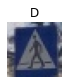


Poprawny : C, A : 14.885866641998291    , B : 14.885866641998291    , C : 40.452203154563904    , D : 14.885944128036499    , X : 14.890126883983612    , 


<Figure size 72x72 with 0 Axes>

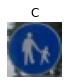


Poprawny : A, A : 40.433469414711       , B : 14.888271689414978    , C : 14.888234436511993    , D : 14.899668097496033    , X : 14.890365302562714    , 


<Figure size 72x72 with 0 Axes>

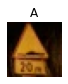


Poprawny : C, A : 14.888375997543335    , B : 14.888270199298859    , C : 40.4331773519516      , D : 14.889387786388397    , X : 14.900797605514526    , 


<Figure size 72x72 with 0 Axes>

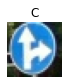


Poprawny : D, A : 15.184742212295532    , B : 15.147195756435394    , C : 16.09053760766983     , D : 38.32400441169739     , X : 15.253517031669617    , 


<Figure size 72x72 with 0 Axes>

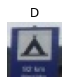


Poprawny : X, A : 14.888061583042145    , B : 14.88746702671051     , C : 14.887580275535583    , D : 40.43971002101898     , X : 14.89717960357666     , 


<Figure size 72x72 with 0 Axes>

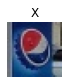


Poprawny : X, A : 14.96235877275467     , B : 39.83709514141083     , C : 14.96235579252243     , D : 15.27358740568161     , X : 14.964598417282104    , 


<Figure size 72x72 with 0 Axes>

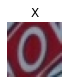


Poprawny : B, A : 14.88570123910904     , B : 40.45944809913635     , C : 14.88495022058487     , D : 14.88495022058487     , X : 14.88495022058487     , 


<Figure size 72x72 with 0 Axes>

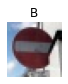


Poprawny : D, A : 29.34311330318451     , B : 15.822137892246246    , C : 15.822073817253113    , D : 15.822133421897888    , X : 23.19054901599884     , 


<Figure size 72x72 with 0 Axes>

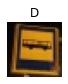


Poprawny : C, A : 14.884757995605469    , B : 14.884757995605469    , C : 40.460968017578125    , D : 14.884757995605469    , X : 14.884757995605469    , 


<Figure size 72x72 with 0 Axes>

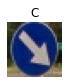


Poprawny : A, A : 40.452006459236145    , B : 14.88589197397232     , C : 14.885926246643066    , D : 14.89025354385376     , X : 14.885923266410828    , 


<Figure size 72x72 with 0 Axes>

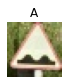


Poprawny : B, A : 14.88485187292099     , B : 40.46022891998291     , C : 14.88485187292099     , D : 14.884869754314423    , X : 14.885200560092926    , 


<Figure size 72x72 with 0 Axes>

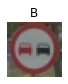


Poprawny : A, A : 15.767042338848114    , B : 15.756884217262268    , C : 15.75695425271988     , D : 30.872976779937744    , X : 21.846140921115875    , 


<Figure size 72x72 with 0 Axes>

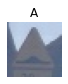


Poprawny : A, A : 15.685456991195679    , B : 15.03937542438507     , C : 15.03930538892746     , D : 15.039463341236115    , X : 39.196398854255676    , 


<Figure size 72x72 with 0 Axes>

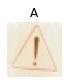


Poprawny : A, A : 40.46095907688141     , B : 14.884759485721588    , C : 14.884759485721588    , D : 14.884759485721588    , X : 14.884762465953827    , 


<Figure size 72x72 with 0 Axes>

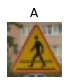


Poprawny : D, A : 14.884836971759796    , B : 14.884838461875916    , C : 14.885042607784271    , D : 40.46034514904022     , X : 14.884932339191437    , 


<Figure size 72x72 with 0 Axes>

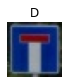


Poprawny : D, A : 15.087465941905975    , B : 15.088814496994019    , C : 15.525321662425995    , D : 38.8032466173172      , X : 15.495146811008453    , 


<Figure size 72x72 with 0 Axes>

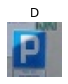


Poprawny : A, A : 40.460893511772156    , B : 14.884768426418304    , C : 14.884768426418304    , D : 14.884768426418304    , X : 14.88480418920517     , 


<Figure size 72x72 with 0 Axes>

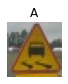


Poprawny : D, A : 15.154743194580078    , B : 15.154726803302765    , C : 16.258011758327484    , D : 38.19791078567505     , X : 15.234608948230743    , 


<Figure size 72x72 with 0 Axes>

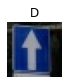


Poprawny : A, A : 40.42068421840668     , B : 14.889846742153168    , C : 14.889843761920929    , D : 14.909560978412628    , X : 14.89005833864212     , 


<Figure size 72x72 with 0 Axes>

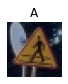


Poprawny : X, A : 15.62567949295044     , B : 15.626530349254608    , C : 16.849589347839355    , D : 18.339921534061432    , X : 33.558282256126404    , 


<Figure size 72x72 with 0 Axes>

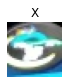


Poprawny : A, A : 40.46096205711365     , B : 14.884757995605469    , C : 14.884757995605469    , D : 14.884759485721588    , X : 14.884757995605469    , 


<Figure size 72x72 with 0 Axes>

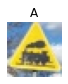


Poprawny : D, A : 14.88504707813263     , B : 14.885048568248749    , C : 14.88504707813263     , D : 40.458691120147705    , X : 14.886170625686646    , 


<Figure size 72x72 with 0 Axes>

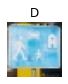


Poprawny : C, A : 14.884757995605469    , B : 14.884757995605469    , C : 40.460968017578125    , D : 14.884757995605469    , X : 14.884757995605469    , 


<Figure size 72x72 with 0 Axes>

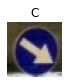


Poprawny : B, A : 14.905188977718353    , B : 40.3641939163208      , C : 14.896966516971588    , D : 14.896975457668304    , X : 14.936673641204834    , 


<Figure size 72x72 with 0 Axes>

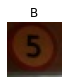


Poprawny : B, A : 14.884814620018005    , B : 40.46051502227783     , C : 14.884814620018005    , D : 14.884814620018005    , X : 14.885039627552032    , 


<Figure size 72x72 with 0 Axes>

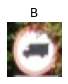


Poprawny : X, A : 23.41231256723404     , B : 15.843084454536438    , C : 15.834742784500122    , D : 15.85623323917389     , X : 29.05362844467163     , 


<Figure size 72x72 with 0 Axes>

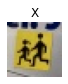


Poprawny : X, A : 15.01104086637497     , B : 15.01104086637497     , C : 15.532459318637848    , D : 15.011069178581238    , X : 39.434388279914856    , 


<Figure size 72x72 with 0 Axes>

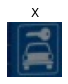

In [27]:
import PIL

import matplotlib.pyplot as plt

# w test_ds dane w batch i w takich porcjach je zwraca
# za kazdym razem w images będze batch_size obrazów

batchi = 0
for images, labels in test_ds.take(int(len(predictions)/batch_size)):
  batchi = batchi + 1
  for predi in range((batchi-1)*batch_size,batchi*batch_size):
    predscore = tf.nn.softmax(predictions[predi])
    text = "{} : {}, ".format("Poprawny", class_names[labels[predi - (batchi-1)*batch_size]])
    for classi in range(len(class_names)):
      text = text + "{} : {: <22}, ".format(class_names[classi], str(100*np.max(predscore[classi])))
    print(text)
    plt.figure(figsize=(1, 1))
    plt.figure(figsize=(1, 1))
    plt.imshow(images[predi - (batchi-1)*batch_size].numpy().astype("uint8"))
    plt.title(class_names[labels[predi - (batchi-1)*batch_size]])
    plt.axis("off")
    plt.show()
    print("")

In [28]:
print("Evaluate test_ds")
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))


Evaluate test_ds
3/3 [==============================] - 0s 14ms/step - loss: 1.0928 - accuracy: 0.8021


{'accuracy': 0.8020833134651184, 'loss': 1.0927942991256714}

In [29]:
print("Evaluate train_ds")
result = model.evaluate(train_ds)
dict(zip(model.metrics_names, result))

Evaluate train_ds
40/40 [==============================] - 1s 13ms/step - loss: 2.5728e-04 - accuracy: 1.0000


{'accuracy': 1.0, 'loss': 0.0002572824014350772}

In [30]:
print("Evaluate val_ds")
result = model.evaluate(val_ds)
dict(zip(model.metrics_names, result))

Evaluate val_ds
6/6 [==============================] - 0s 14ms/step - loss: 1.2506 - accuracy: 0.7471


{'accuracy': 0.7470588088035583, 'loss': 1.2506076097488403}